# Inputs

In [1346]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import subprocess
from sklearn.preprocessing import MinMaxScaler
from IPython.display import SVG

results = "results.csv"
cleaned_results = "cleaned_results.csv"


plt.rcParams['text.usetex'] = True
sns.set()

In [1468]:
# Real Function
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

def plt_svg(svg_path):
    subprocess.run(["convert", svg_path + ".svg", svg_path + ".png"], shell=True)
    return plt.imread(svg_path + ".png")

def least_squares_fit(function, X, y, guess, method=None):
    params, covariance = curve_fit(function, X, y, guess, method=method, maxfev=1000000)
    return params

def least_squares(X, y_real, func, *params):
    if params:
        y_pred = func(X, *params)
    else:
        y_pred = func(X)
    return np.sum( (y_real - y_pred)**2)/len(y_real)

# Adjusting Data

In [1429]:
dirs = ["output", "output_const_range", "output_generations", "output_inten_scaled", "output_intensified", "output_scaled"]

for d in dirs:
    data = pd.read_csv(d + "/" + results)
    colum = []
    for col in data.columns:
        colum.append(col.strip())
    data.columns = colum
    data.to_csv(d + "/" + cleaned_results, index=False)

# Output

In [1430]:
path = "output/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

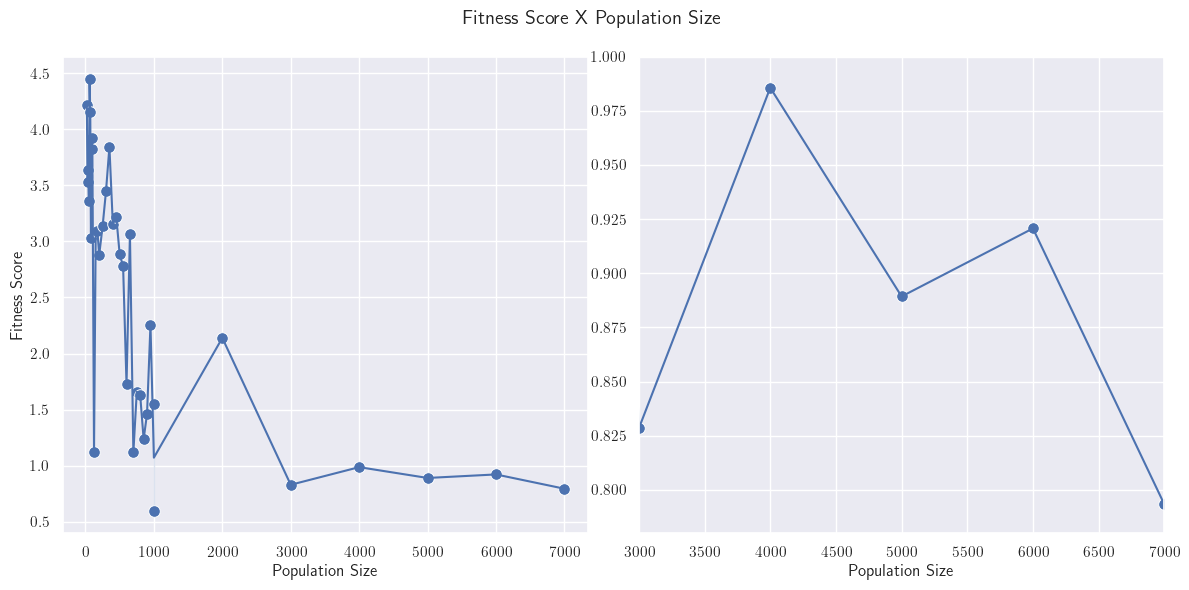

In [1431]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Fitness Score X Population Size")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)
plt.tight_layout()

for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((3000, 7000))
axs[1].set_ylim((0.78, 1))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

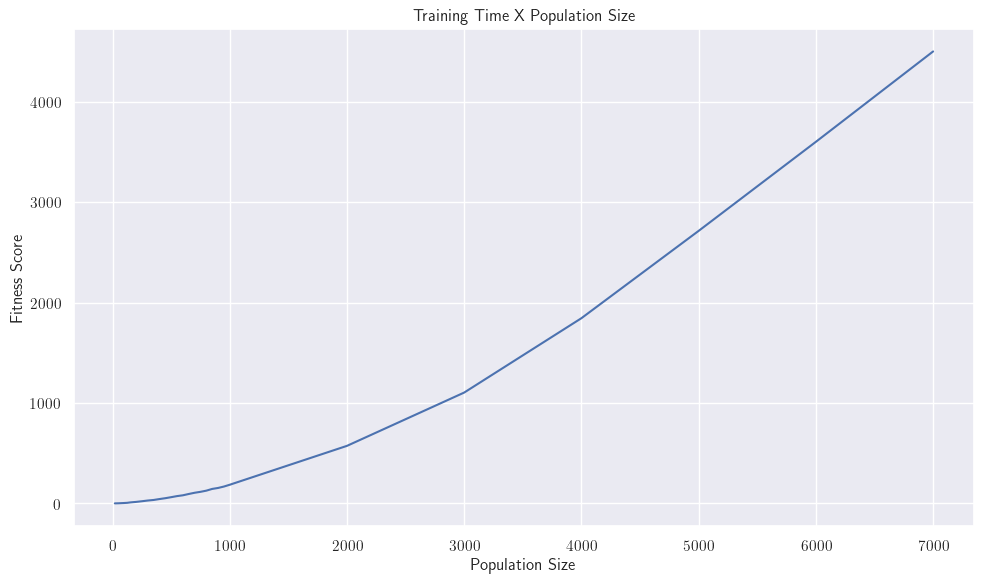

In [1432]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Fitness Score")

plt.show()

## Best Fit

In [1433]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")

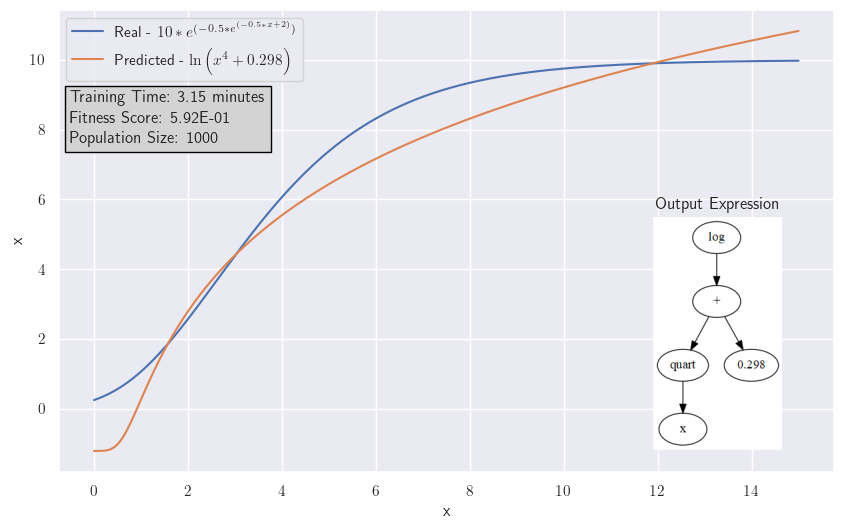

In [1434]:
# fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

plt.figure(figsize=(10, 6))
plt.tight_layout()

sns.lineplot(x=best_data.x, y=func(best_data.x), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=best_data.x, y=best_data.y, label=r"Predicted - $\ln\Big(x^4 + 0.298\Big)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Fitness Score: {best_tree.fitness_score[0]:.2E}
Population Size: {best_index}""", 
            (-0.5, 7.6), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.6, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Output Expression")

plt.show()

# Output Scaled

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- Constants range from 0 to 1

## Reverse Transform
$$x' = \frac{x - \min(x)}{\max(x) - \min(x)} \hspace{20mm} y'(x') = \frac{y(x) - \min(y(x))}{\max(y(x)) - \min(y(x))}$$

$$x = \Big(\max(x) - \min(x)\Big)x' + \min(x) \hspace{20mm} y(x) = \Big(\max(y(x)) - \min(y(x))\Big)y'(x') + \min(y(x))$$

The reverse transform outputed by the SR algorithm is
$$y(x) = \Big(\max(y(x)) - \min(y(x))\Big)y'\left(\frac{x - \min(x)}{\max(x) - \min(x)}\right) + \min(y(x))$$
Where:
- $y'$: Is the scaled function (outputed by the SR algorithm for a scaled input)

In [1435]:
path = "output_scaled/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

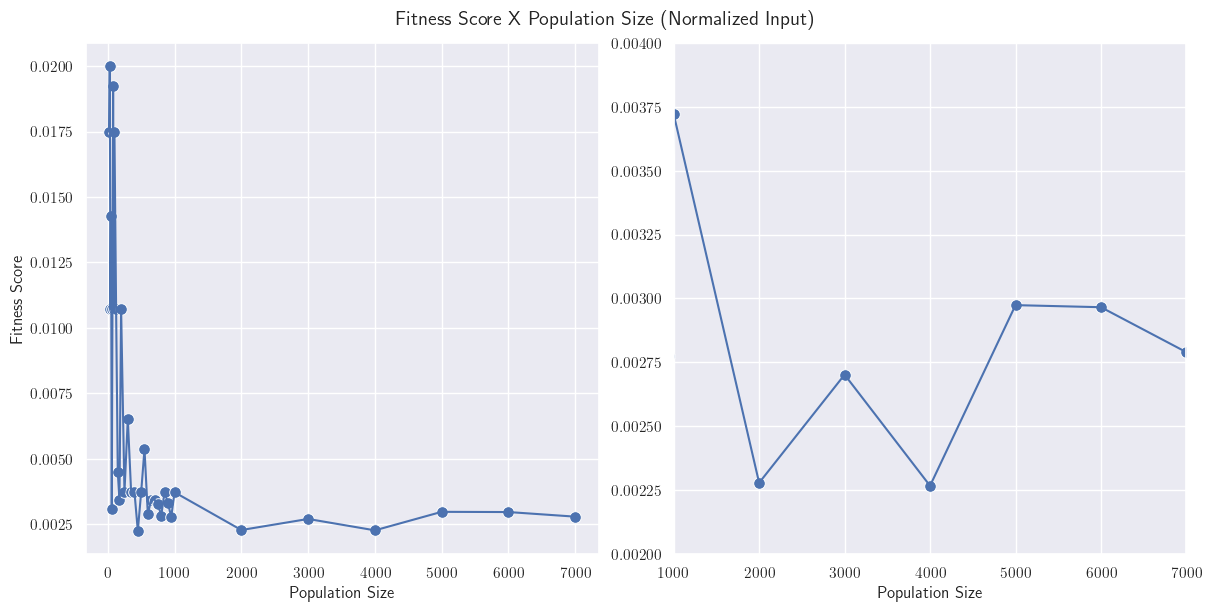

In [1436]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Normalized Input)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((0.0020, 0.0040))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

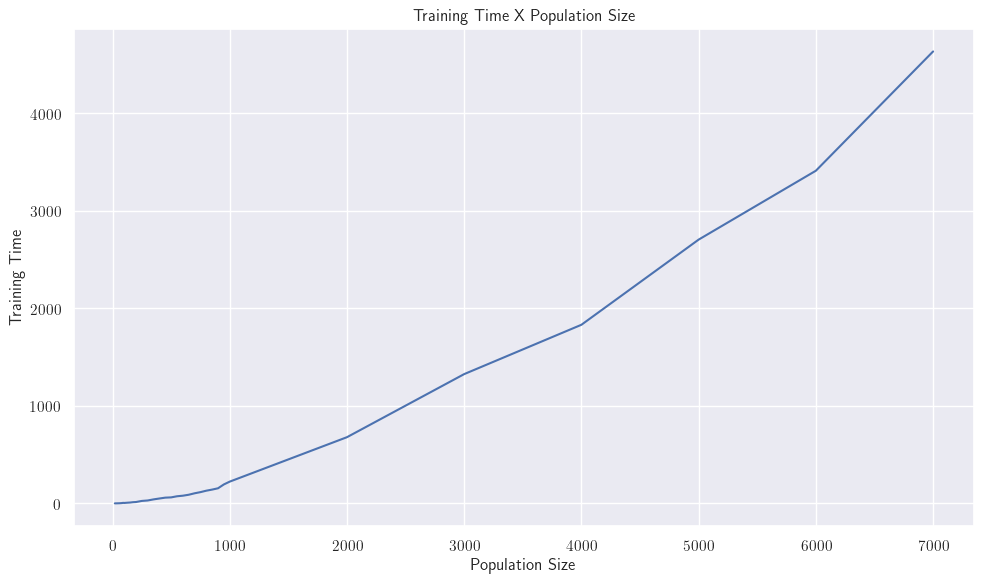

In [1437]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

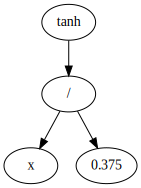

In [1438]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
display(SVG(img_path + ".svg"))

In [1439]:
X = np.linspace(0, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    return np.tanh((X - X.min())/(0.375 * X_range))*y_range + y.min()

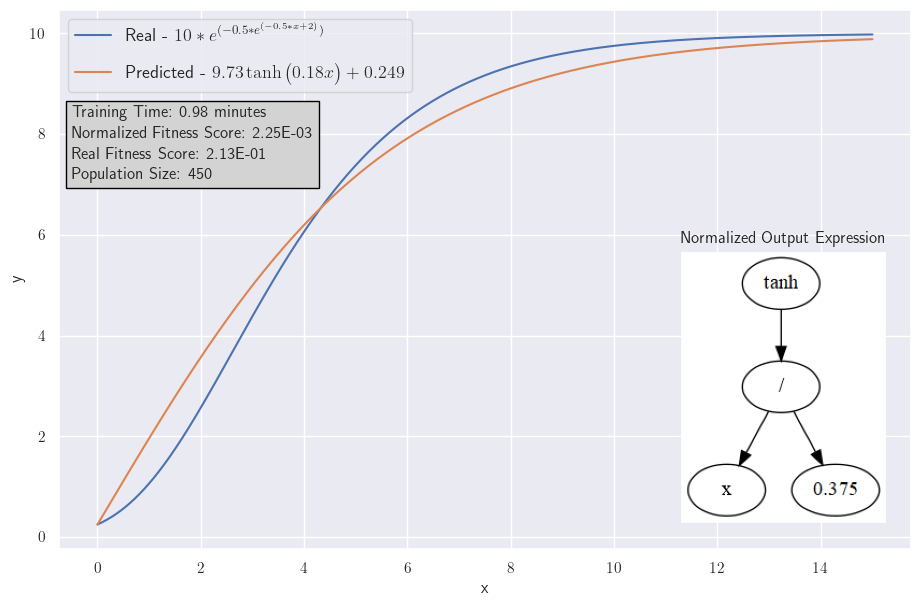

In [1440]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-0.5, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)


img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.6, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")

plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [1441]:
def model(X, a, b, c, d):
    return a * np.tanh(b*X + c) + d

params = least_squares_fit(model, X, y, [1, 1, 1, 1])
params

array([ 5.94633557,  0.29071247, -0.81410775,  4.00065131])

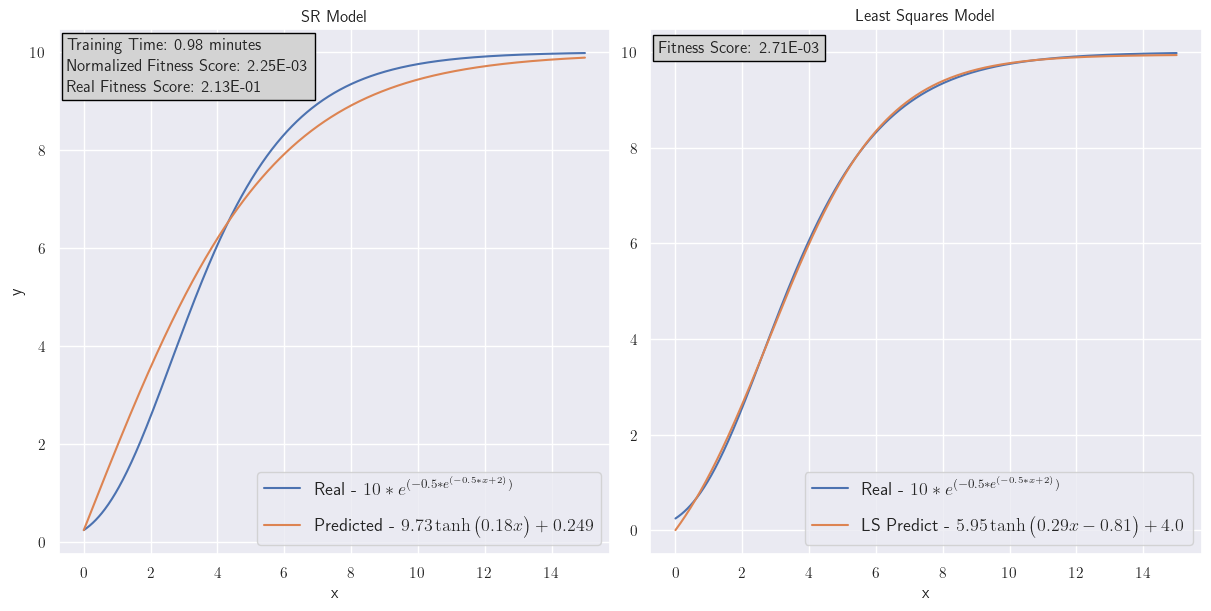

In [1442]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 13}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $5.95\tanh \Big(0.29x - 0.81\Big) + 4.0$")
axs[1].legend(prop={"size": 13}, labelspacing=1)
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

plt.show()

# Output Changing Constants Range

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- X range: (0, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- Normalized input (range from 0 to 1)
- 🔴 Constants range from -10 to 10

In [1443]:
path = "output_const_range/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

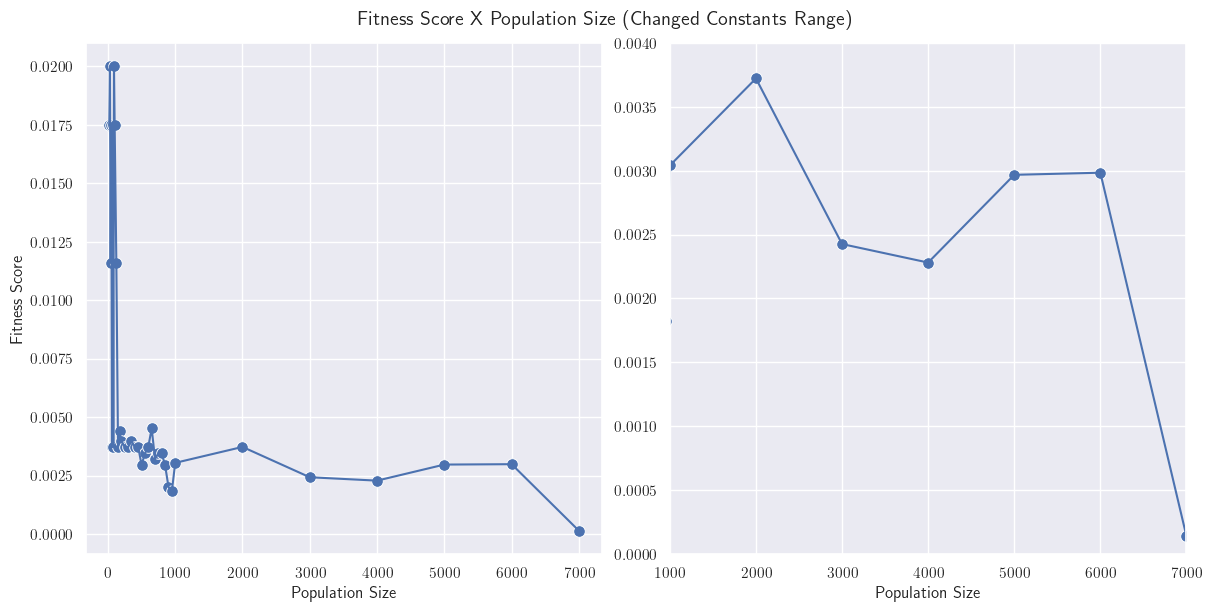

In [1444]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Changed Constants Range)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0])
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((0, 0.0040))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

In [1445]:
no_outlier_data = data.drop(32, axis=0)

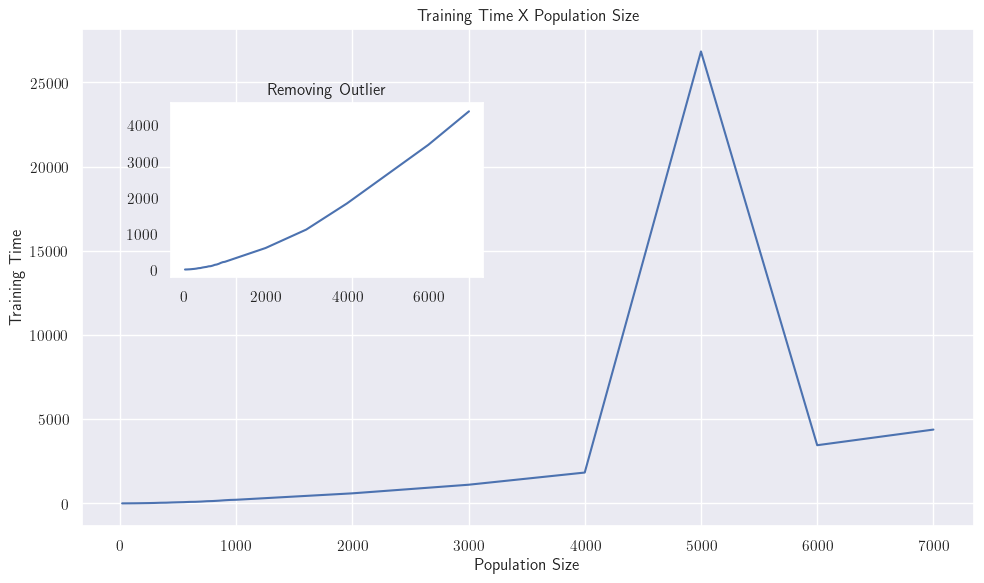

In [1446]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

ins = plt.gca().inset_axes([0.1, 0.5, 0.35, 0.35])
ins.set_facecolor("white")
ins.set_ylabel(" ", visible=False)
ins.set_xlabel(" ", visible=False)
ins.set_title("Removing Outlier")

sns.set_style("white")
sns.lineplot(data, x=no_outlier_data.population_size, y=no_outlier_data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

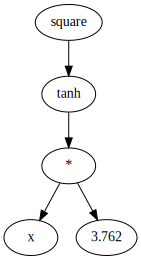

In [1447]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [1448]:
X = np.linspace(0, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*X))**2
    return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()

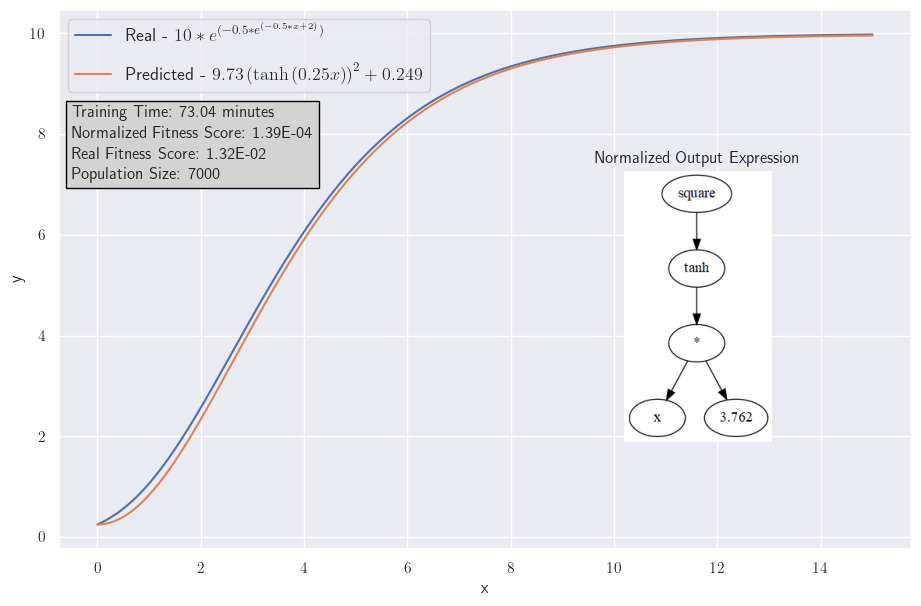

In [1449]:
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\left(\tanh\left(0.25x\right)\right)^2 + 0.249$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-0.5, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [1450]:
def model(X, a, b, c, d, e, f):
    return a*(b * np.tanh(c*X + d) + e)**2 + f

params = least_squares_fit(model, X, y, [1, 1, 1, 1, 1, 1])
params

array([ 1.37956513,  2.28262819,  0.25425682, -0.07690432,  0.37971209,
        0.216474  ])

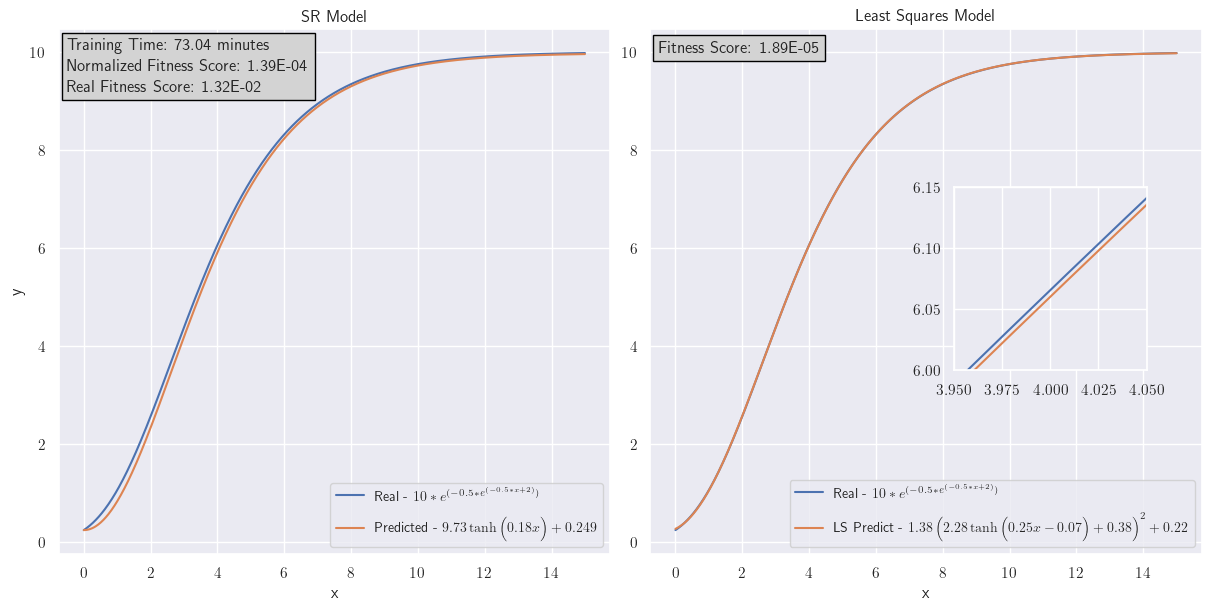

In [1451]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $1.38\left(2.28 \tanh\Big(0.25x -0.07\Big) + 0.38\right)^2 + 0.22$")
axs[1].legend(prop={"size": 10}, labelspacing=1)
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

ins = axs[1].inset_axes([0.55, 0.35, 0.35, 0.35])
sns.lineplot(x=X, y=func(X), ax=ins)
sns.lineplot(x=X, y=model(X, *params), ax=ins)
ins.set_xlim((3.95,4.05))
ins.set_ylim((6,6.15))

plt.show()

# Output Intensified

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (-5, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- Non Normalized input
- Constants range from -10 to 10

In [1452]:
path = "output_intensified/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

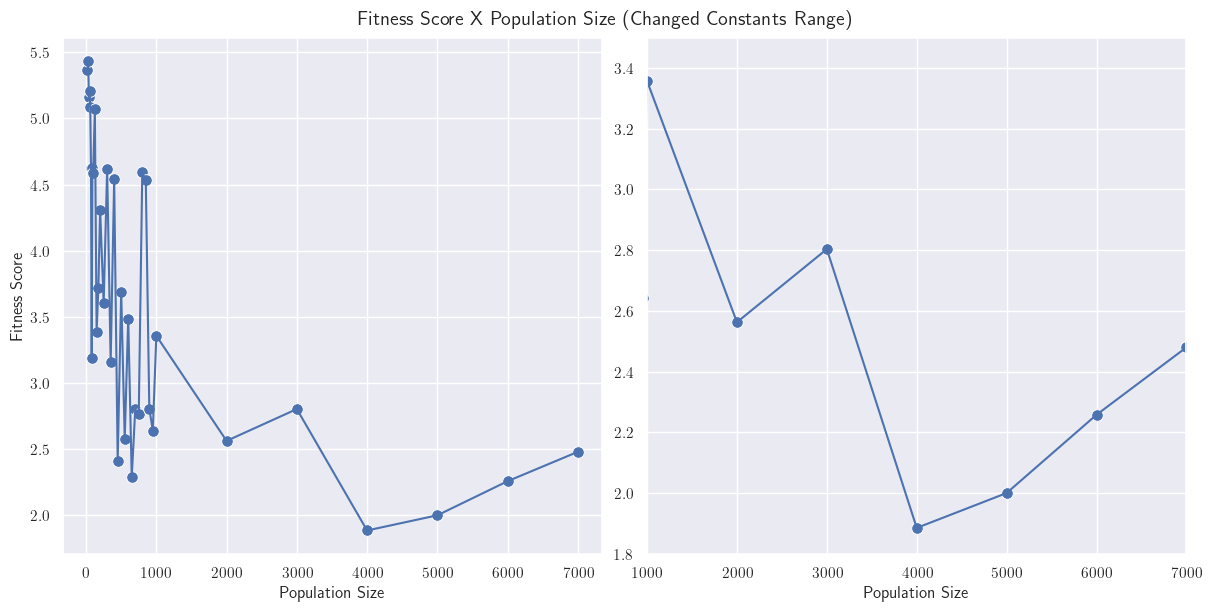

In [1453]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Changed Constants Range)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)


for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim((1000, 7000))
axs[1].set_ylim((1.8, 3.5))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

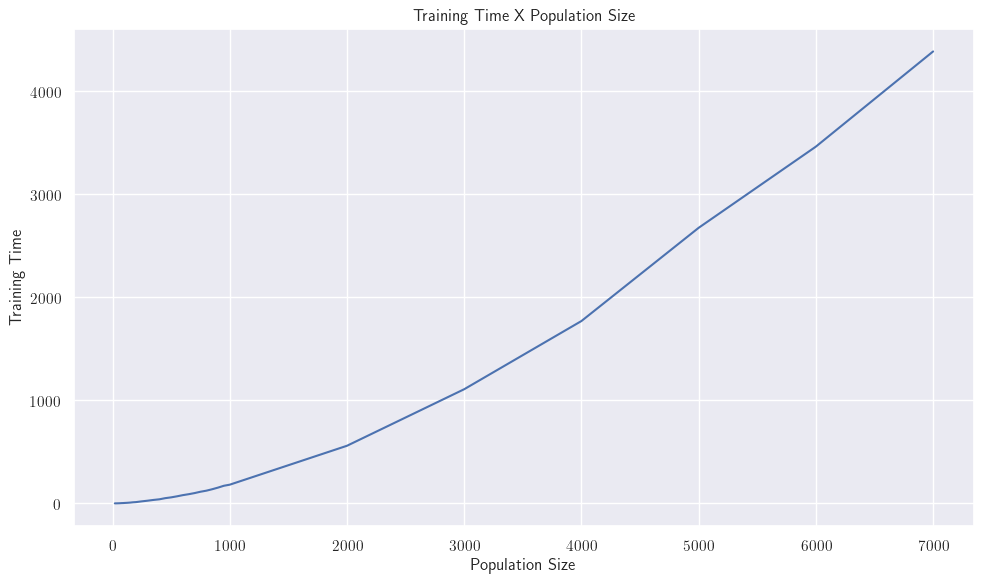

In [1454]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.population_size, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

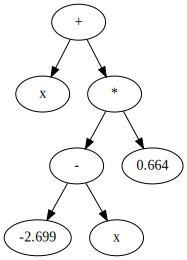

In [1455]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [1456]:
X = best_data.x
y = func(X)

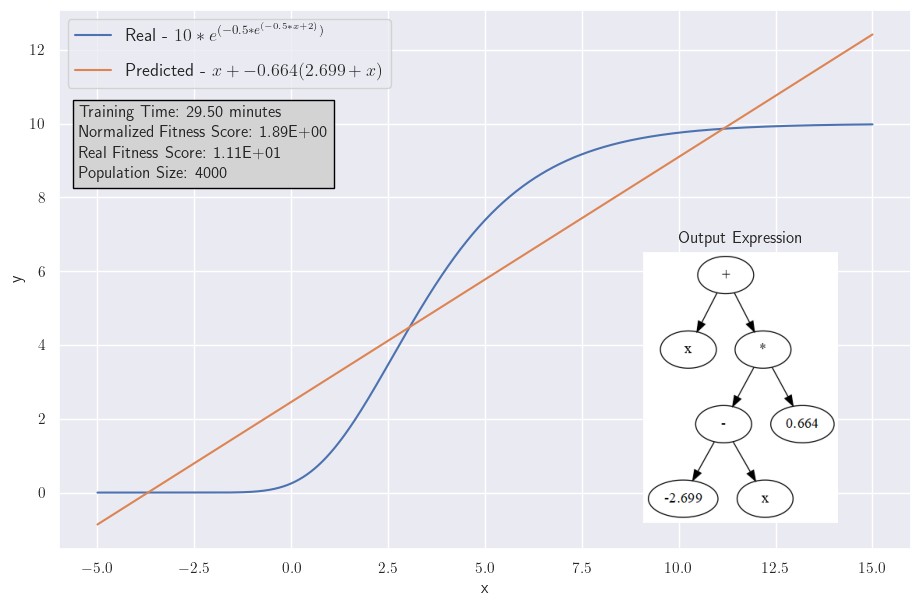

In [1457]:
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=best_data.x, y=func(best_data.x), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=best_data.x, y=best_data.y, label=r"Predicted - $x+-0.664(2.699 + x)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-5.48, 8.5), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.55, 0.05, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [1458]:
def model(X, a, b):
    return a * X + b

params = least_squares_fit(model, X, y, [1, 1])
params

array([0.68943329, 2.17017923])

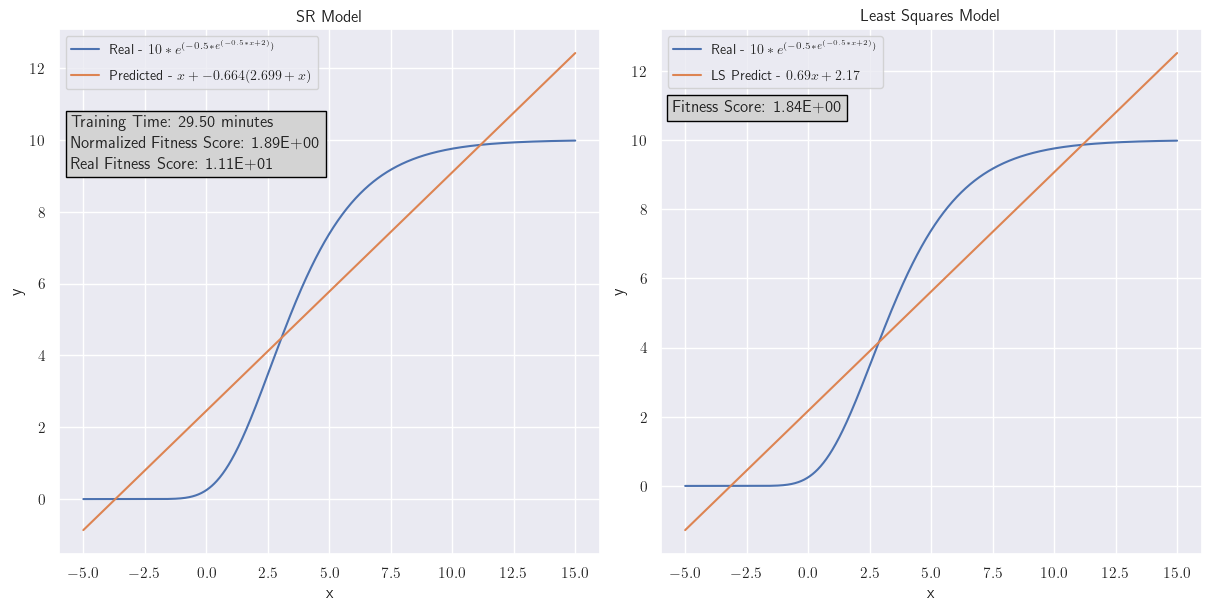

In [1459]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=best_data.y, label=r"Predicted - $x+-0.664(2.699 + x)$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-5.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $0.69x + 2.17$")
axs[1].legend(prop={"size": 10}, labelspacing=1)
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-5.5, 10.8), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

plt.show()

# Output Normalized Intensified 

Equation
$$10*\exp(-0.5*exp(-0.5*x + 2))$$
- 🔴 X range: (-5, 15)

- Max generations = 3
- max_expression_size: 3
- max_island_count: population/10

- 🔴 Normalized input (range from 0 to 1)
- Constants range from -10 to 10

In [1460]:
path = "output_inten_scaled/"
img_path = path + "trees/"
data_path = path + "data/"

data = pd.read_csv(path + cleaned_results)

## Fitness X Population Size

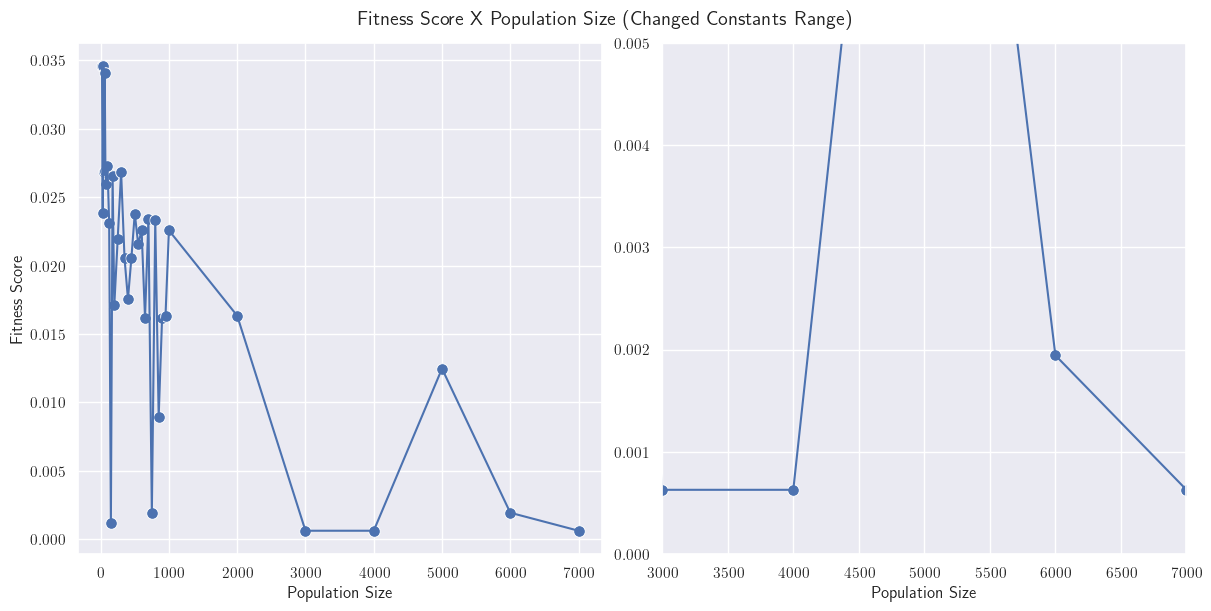

In [1461]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
plt.suptitle("Fitness Score X Population Size (Changed Constants Range)")


sns.lineplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0]) 
sns.scatterplot(data, x=data.population_size, y=data["fitness_score"], ax=axs[0], s=70)

for ax in axs:
    ax.set_xlabel("Population Size")
    ax.set_ylabel("Fitness Score")
    
axs[1].set_xlim(3000, 7000)
axs[1].set_ylim((0, 0.0050))
axs[1].set_ylabel(" ", visible=False)


sns.lineplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1])
sns.scatterplot(data, x=data.population_size, y=data.fitness_score, ax=axs[1], s=70)
plt.show()

## Training Time X Population Size

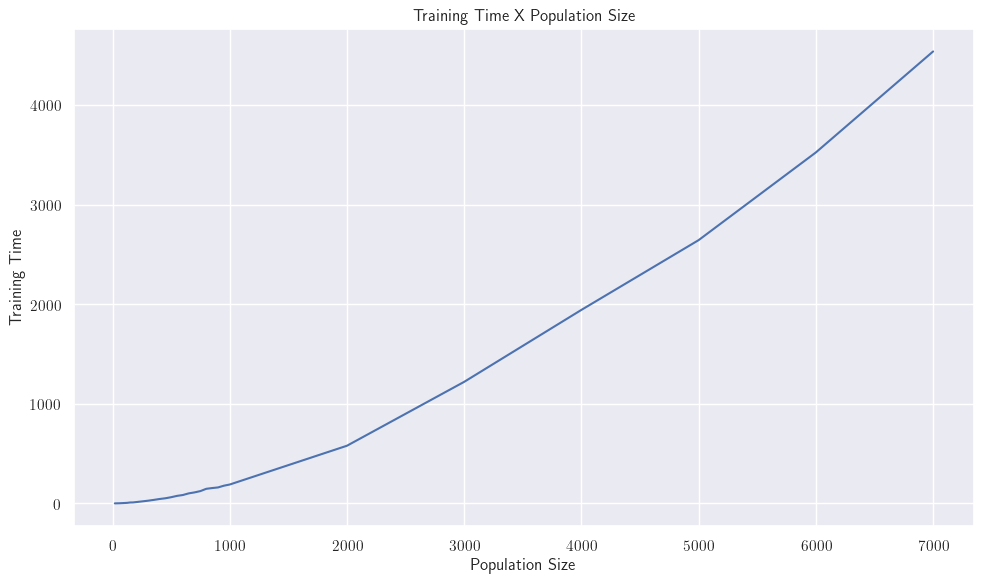

In [1462]:
plt.figure(figsize=(10, 6))
plt.title("Training Time X Population Size ")

sns.lineplot(data, x=data.population_size, y=data["training_time"]) 

sns.set_style("white")
sns.lineplot(data, x=data.population_size, y=data["training_time"], ax=ins) 
sns.set()
plt.tight_layout()

plt.xlabel("Population Size")
plt.ylabel("Training Time")

plt.show()

## Best Fit

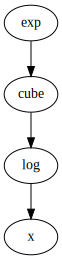

In [1463]:
best_tree = data.sort_values("fitness_score", axis=0)
best_tree = best_tree.reset_index(drop=True)
best_index = str(best_tree.population_size[0])

img_path = path + "trees/tree-" + best_index

best_data = pd.read_csv(path + f"data/data-{best_index}.csv")
SVG(img_path + ".svg")

In [1464]:
X = np.linspace(-5, 15, 1000)
y = func(X)

X_range = X.max() - X.min()
y_range = y.max() - y.min()

def output_func(X):
    # return (np.tanh(3.762*(X - X.min())/(X_range)))**2 * y_range + y.min()
    return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()

$$9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$$

C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()


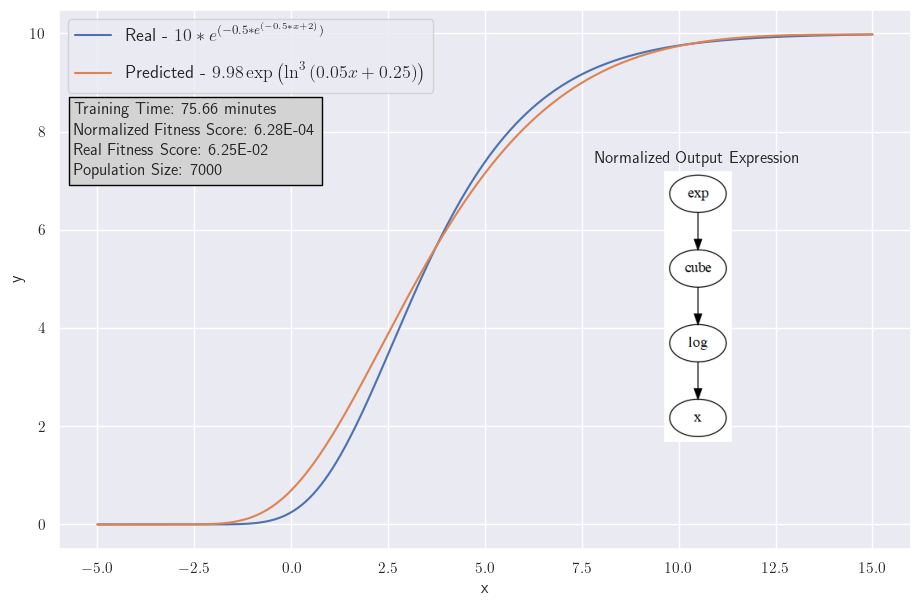

In [1465]:
plt.figure(figsize=(11, 7))
plt.tight_layout()

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$")
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.98\exp\left(\ln^3\left(0.05x + 0.25\right)\right)$")

plt.annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}
Population Size: {best_index}""", 
            (-5.6, 7.1), bbox={"facecolor": "lightgray", "edgecolor": "black"},
            linespacing = 1.5)

img = plt_svg(img_path)
ins = plt.gca().inset_axes([0.5, 0.2, 0.5, 0.5])
ins.imshow(img)
ins.get_xaxis().set_visible(False)
ins.get_yaxis().set_visible(False)
ins.set_title(f"Normalized Output Expression")


plt.ylabel("y")
plt.xlabel("x")

plt.legend(prop={"size": 13}, labelspacing=1, loc="upper left")
plt.show()

## Lest Squares Fit

In [1519]:
def model(X, a, b, c, d, e):
    return a*np.exp(d*(np.log(c*X) +e)**3 ) + b 

scaler = MinMaxScaler((0,1))
X_scaled = scaler.fit_transform(np.c_[X]).reshape(1000, )
y_scaled = scaler.fit_transform(np.c_[y]).reshape(1000, )

params = least_squares_fit(model, X_scaled, y_scaled, [1, 1, 1, 1, 1])
params

C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\1098609051.py:2: RuntimeWarning: divide by zero encountered in log
  return a*np.exp(d*(np.log(c*X) +e)**3 ) + b
C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\1098609051.py:2: RuntimeWarning: invalid value encountered in log
  return a*np.exp(d*(np.log(c*X) +e)**3 ) + b


array([ 0.99073414, -0.00250642,  0.34961345,  1.77810566,  1.19440164])

In [1520]:
def model(X, a, b, c, d, e):
    return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()

C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\2281423423.py:9: RuntimeWarning: divide by zero encountered in log
  return np.exp((np.log( (X - X.min())/X_range ))**3) * y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\470161758.py:2: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\470161758.py:2: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()
C:\Users\lreis\AppData\Local\Temp\ipykernel_4608\470161758.py:2: RuntimeWarning: divide by zero encountered in log
  return (a * np.exp(d * (np.log(c*(X - X.min())/(X_range)) + e)**3) + b)*y_range + y.min()

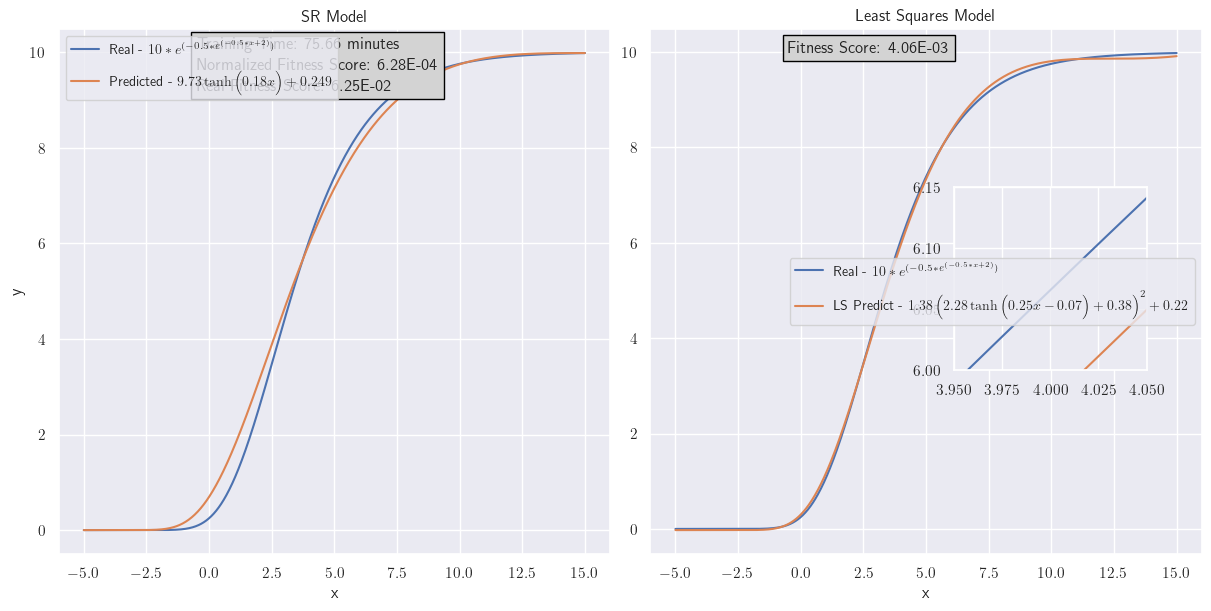

In [1515]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[0])
sns.lineplot(x=X, y=output_func(X), label=r"Predicted - $9.73\tanh\Big(0.18x\Big) + 0.249$", ax=axs[0])


# Axis 1
axs[0].annotate(f"""Training Time: {best_tree.training_time[0]/60.0:.2f} minutes
Normalized Fitness Score: {best_tree.fitness_score[0]:.2E}
Real Fitness Score: {least_squares(X, y, output_func):.2E}""", 
            (-0.5, 9.2), bbox={"facecolor": "lightgray", "edgecolor": "black"},
               linespacing = 1.5)

axs[0].legend(prop={"size": 10}, labelspacing=1)
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[0].set_title("SR Model")


# Axis 2
sns.lineplot(x=X, y=func(X), label=r"Real - $10*e^{(-0.5*e^{(-0.5*x + 2)})}$", ax=axs[1])
sns.lineplot(x=X, y=model(X, *params), ax=axs[1], label=r"LS Predict - $1.38\left(2.28 \tanh\Big(0.25x -0.07\Big) + 0.38\right)^2 + 0.22$")
axs[1].legend(prop={"size": 10}, labelspacing=1)
axs[1].set_xlabel("x")

axs[1].annotate(f"""Fitness Score: {least_squares(X, y, model, *params):.2E}""", 
            (-0.5, 10), bbox={"facecolor": "lightgray", "edgecolor": "black"})
axs[1].set_title("Least Squares Model")

ins = axs[1].inset_axes([0.55, 0.35, 0.35, 0.35])
sns.lineplot(x=X, y=func(X), ax=ins)
sns.lineplot(x=X, y=model(X, *params), ax=ins)
ins.set_xlim((3.95,4.05))
ins.set_ylim((6,6.15))

plt.show()